c:\Users\admin\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


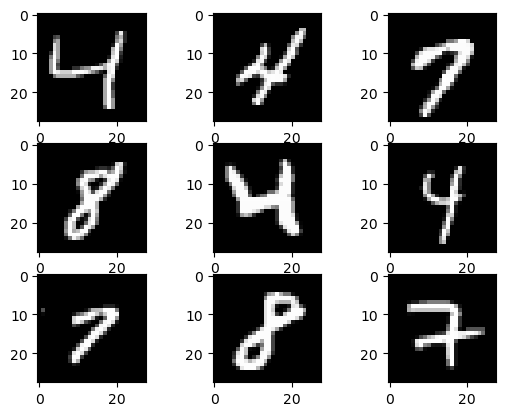

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784',as_frame=False)
x, y = mnist.data.astype('float32'), mnist.target.astype('int')
x=x/ 255.0
digits_478=[4,7,8]
indices_478 = np.isin(y, digits_478)
train_x = x[indices_478]
train_y = y[indices_478]
train_x=train_x[0:900]
train_y=train_y[0:900]
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_x[i].reshape(28,28), cmap=plt.get_cmap('gray'))
#mean vector overall data set
mean_x=np.mean(train_x,axis=0).reshape(784,1)
#mean vectors for classes
mean_x_4=np.mean(train_x[train_y==4],axis=0).reshape(784,1)
mean_x_7=np.mean(train_x[train_y==7],axis=0).reshape(784,1)
mean_x_8=np.mean(train_x[train_y==8],axis=0).reshape(784,1)
#covariance matrix for classes
def class_covariance_matrix(x,mean_vector):
  covariance_matrix=np.zeros((mean_vector.shape[0],mean_vector.shape[0]))
  Ck=x.shape[0]
  mean_vector=mean_vector.reshape(mean_vector.shape[0],1)
  for xi in x:
    xi=xi.reshape(mean_vector.shape[0],1)
    xi_uk=xi-mean_vector
    covariance_matrix+=np.dot(xi_uk,xi_uk.T)
  covariance_matrix=covariance_matrix/Ck
  return covariance_matrix

#covariance matrix for classes
x_points_4=train_x[train_y==4]
ScatterMatrix_K_4=class_covariance_matrix(x_points_4,mean_x_4)
# ScatterMatrix_K_4

x_points_7=train_x[train_y==7]
ScatterMatrix_K_7=class_covariance_matrix(x_points_7,mean_x_7)

x_points_8=train_x[train_y==8]
ScatterMatrix_K_8=class_covariance_matrix(x_points_8,mean_x_8)
# SW within class scatter matrix
Scatter_matrix_w=ScatterMatrix_K_4+ScatterMatrix_K_7+ScatterMatrix_K_8
#SB between class scatter matrix
Scatter_matrix_B=np.zeros((mean_x.shape[0],mean_x.shape[0]))

uk_u=mean_x-mean_x_4
Scatter_matrix_B+=x_points_4.shape[0]*(np.dot(uk_u,uk_u.T))

uk_u=mean_x-mean_x_7
Scatter_matrix_B+=x_points_7.shape[0]*(np.dot(uk_u,uk_u.T))

uk_u=mean_x-mean_x_8
Scatter_matrix_B+=x_points_8.shape[0]*(np.dot(uk_u,uk_u.T))
# Regularization of  the within-class scatter matrix so as to avoid inverse problem(singular matrix)
hyperparameter=1
Scatter_matrix_w_regularized=Scatter_matrix_w + hyperparameter*np.eye(Scatter_matrix_w.shape[0],dtype=np.float32)
Scatter_matrix_w_inverse=np.linalg.inv(Scatter_matrix_w_regularized)
SWinv_SB=np.dot(Scatter_matrix_w_inverse,Scatter_matrix_B)
eigenvalues,eigenvectors=np.linalg.eigh(SWinv_SB)
sorted_index = np.argsort(eigenvalues)[::-1]
# print(sorted_index)
eigenvalues_sorted=eigenvalues[sorted_index]
eigenvectors_sorted=eigenvectors[:,sorted_index]

(2, 900)


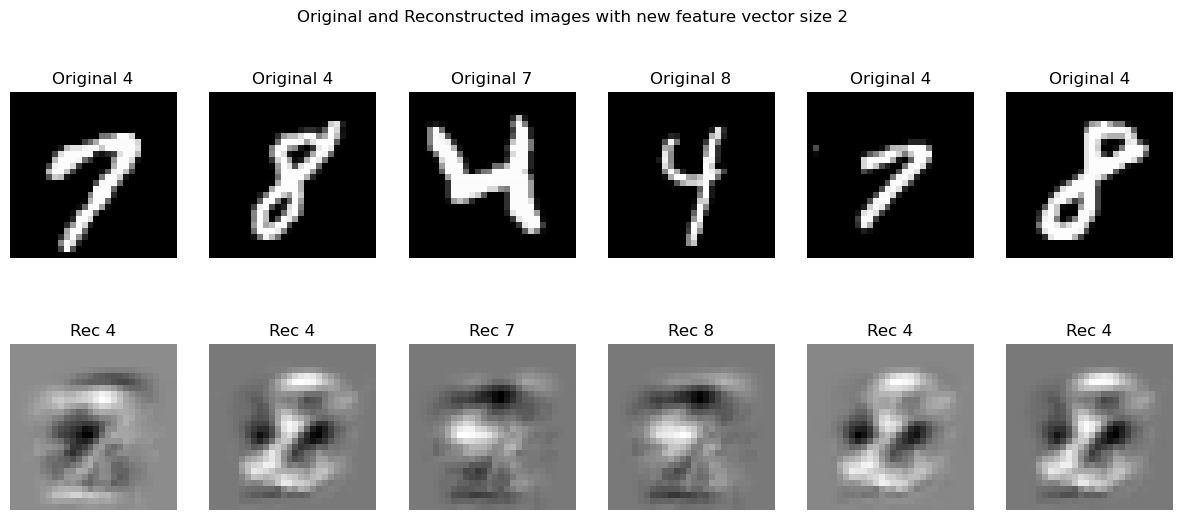

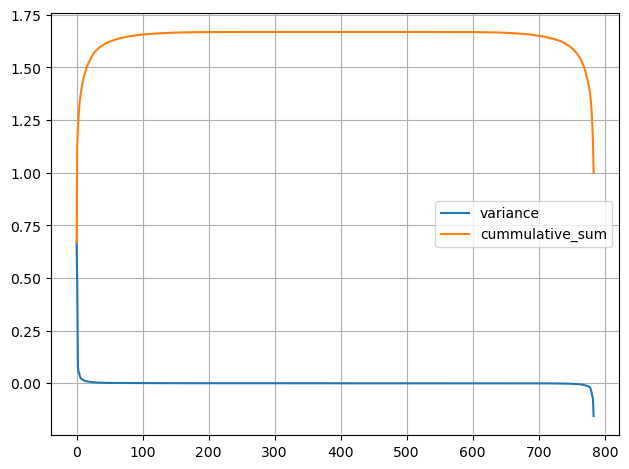

In [7]:
m_array=[2]
#MATRIX A of top m eigenvectors
principal_components=eigenvectors_sorted[:,:m].T
#new feature vector
y=np.dot(principal_components,train_x.T)
print(y.shape)
#reconstruction from m to 784 for visualization
reconstructed_x=np.dot(principal_components.T,y).T

# now we will plot first 10 images for each m
# for plotting it should be in transformed from 784 to 28x28
images=train_x[2:8].reshape(-1,28,28)
reconstructed_images=reconstructed_x[2:8].reshape(-1,28,28)

plt.figure(figsize=(15, 6))
for i in range(6):
    plt.subplot(2, 6, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f'Original {train_y[i]}')
    plt.axis('off')

    plt.subplot(2, 6, i + 1 +6)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.title(f'Rec {train_y[i]}')
    plt.axis('off')

plt.suptitle(f'Original and Reconstructed images with new feature vector size {m}')
plt.show()

variance=(eigenvalues_sorted/np.sum(eigenvalues_sorted)).real
plt.plot(variance,label="variance")
cummulative_sum=np.cumsum(variance)
plt.plot(cummulative_sum,label="cummulative_sum")
plt.tight_layout()
plt.legend()
plt.grid()